# Experiment 1

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

# Helper Functions

In [2]:
def exponential(p, x):
    return p[0] * np.exp(-p[1] * x)

def residual(p,func, xvar, yvar, err):
    return (func(p, xvar) - yvar)/err

In [3]:
# The code below defines our data fitting function.
# Inputs are:
# initial guess for parameters p0
# the function we're fitting to
# the x,y, and dy variables
# tmi can be set to 1 or 2 if more intermediate data is needed

def data_fit(p0, func, xvar, yvar, err, tmi=0):
    try:
        fit = optimize.least_squares(residual, p0, args=(func,xvar, yvar, err), verbose=tmi)
    except Exception as error:
        print("Something has gone wrong:", error)
        return p0, np.zeros_like(p0), np.nan, np.nan
    pf = fit['x']

    print()

    try:
        cov = np.linalg.inv(fit['jac'].T.dot(fit['jac']))          
        # This computes a covariance matrix by finding the inverse of the Jacobian times its transpose
        # We need this to find the uncertainty in our fit parameters
    except:
        # If the fit failed, print the reason
        print('Fit did not converge')
        print('Result is likely a local minimum')
        print('Try changing initial values')
        print('Status code:', fit['status'])
        print(fit['message'])
        return pf, np.zeros_like(pf), np.nan, np.nan
            #You'll be able to plot with this, but it will not be a good fit.

    chisq = sum(residual(pf, func, xvar, yvar, err) **2)
    dof = len(xvar) - len(pf)
    red_chisq = chisq/dof
    pferr = np.sqrt(np.diagonal(cov)) # finds the uncertainty in fit parameters by squaring diagonal elements of the covariance matrix
    print('Converged with chi-squared {:.2f}'.format(chisq))
    print('Number of degrees of freedom, dof = {:.2f}'.format(dof))
    print('Reduced chi-squared {:.2f}'.format(red_chisq))
    print()
    Columns = ["Parameter #","Initial guess values:", "Best fit values:", "Uncertainties in the best fit values:"]
    print('{:<11}'.format(Columns[0]),'|','{:<24}'.format(Columns[1]),"|",'{:<24}'.format(Columns[2]),"|",'{:<24}'.format(Columns[3]))
    for num in range(len(pf)):
        print('{:<11}'.format(num),'|','{:<24.3e}'.format(p0[num]),'|','{:<24.3e}'.format(pf[num]),'|','{:<24.3e}'.format(pferr[num]))
    return pf, pferr, chisq,dof

# Fitted Photon Rate Curves

In [4]:
data = {
    'cs137': {
        31: {
            'x': np.array([0.2, 0.1, 0.4, 0.8, 1.6, 6.5]) / 100, 
            't': np.array([123, 120, 125, 121, 128, 184]), 
            'net': np.array([678, 903, 583, 372, 129, 15]), 
            'gross': np.array([4032, 2839, 2078, 1498, 1137, 1063])
        }, 
        662: {
            'x': np.array([0.4, 0.8, 1.6, 0.2, 0.1, 3.2, 3.2, 0.2, 0.1]) / 100, 
            't': np.array([182, 148, 146, 130, 114, 125, 302, 180, 195]), 
            'net': np.array([12847, 9955, 8276, 9764, 8511, 5287, 12639, 13706, 14600]), 
            'gross': np.array([12847, 9955, 8276, 9764, 8511, 5287, 12639, 13706, 14600])
        }
    }, 
    'na22': {
        511: {
            'x': np.array([0.4, 0.8, 1.6, 0.1, 3.2, 0.2]) / 100, 
            't': np.array([123, 123, 121, 122, 123, 119]), 
            'net': np.array([42356, 37307, 31740, 43515, 22774, 41716]), 
            'gross': np.array([56957, 46081, 40516, 51989, 30838, 49816])
        }, 
        1275: {
            'x': np.array([0.4, 0.8, 1.6, 0.1, 3.2, 0.2]) / 100, 
            't': np.array([123, 123, 121, 122, 123, 119]), 
            'net': np.array([8016, 7519, 6516, 8128, 5200, 7708]), 
            'gross': np.array([8822, 8201, 7322, 9059, 6008, 8701])
        }
    }, 
    'ba133': {
        32: {
            'x': np.array([0.2, 0.4, 0.8, 1.6, 3.2, 0.1]) / 100, 
            't': np.array([122, 121, 122, 121, 122, 120]), 
            'net': np.array([31161, 19399, 8021, 2945, 1126, 39364]), 
            'gross': np.array([36810, 23824, 11053, 4378, 2240, 45749]), 
        }, 
        81: {
            'x': np.array([0.2, 0.4, 0.8, 1.6, 3.2, 0.1]) / 100, 
            't': np.array([122, 121, 122, 121, 122, 120]), 
            'net': np.array([22249, 19676, 16945, 12206, 4498, 22441]), 
            'gross': np.array([33914, 31147, 27116, 20657, 10709, 34632]), 
        }, 
        356: {
            'x': np.array([0.2, 0.4, 0.8, 1.6, 3.2, 0.1]) / 100, 
            't': np.array([122, 121, 122, 121, 122, 120]), 
            'net': np.array([13494, 10389, 10284, 8139, 5419, 11637]), 
            'gross': np.array([27093, 23821, 22254, 18433, 12560, 24729]), 
        }
    }
}

In [5]:
x, t, net, gross = data['cs137'][31].values()

title = 'Cesium-137 31 KeV Photon Rate\nThrough Aluminum Absorbers'

In [6]:
dx = np.array([0.1] * len(x)) / 100 # Meters
dt = np.array([1] * len(t)) # Seconds
b = gross - net
dnet = np.sqrt(gross + b)
R = net/t
dR = (dnet/net + dt/t) * R


Converged with chi-squared 1.78
Number of degrees of freedom, dof = 4.00
Reduced chi-squared 0.45

Parameter # | Initial guess values:    | Best fit values:         | Uncertainties in the best fit values:
0           | 3.000e+02                | 8.024e+00                | 6.507e-01               
1           | 1.000e+02                | 1.279e+02                | 1.829e+01               


Text(0.5, 1.0, 'Cesium-137 31 KeV Photon Rate\nThrough Aluminum Absorbers')

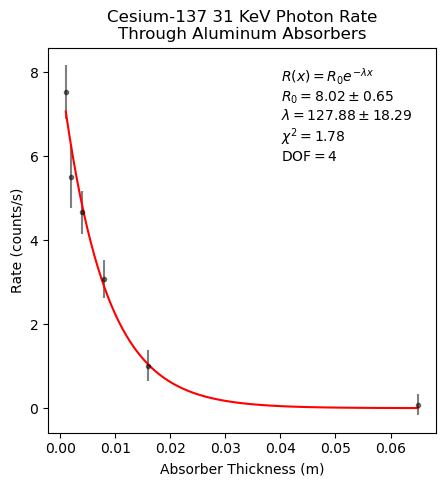

In [7]:
fig, ax = plt.subplots(figsize=(5, 5))

params_i = [300, 100]
params_f, params_err, chisq, dof = data_fit(params_i, exponential, x, R, dR)

ax.errorbar(x, R, dR, fmt='k.', alpha=0.5, label='Data')
linspace = np.linspace(x.min(), x.max(), 100)
ax.plot(linspace, exponential(params_f, linspace), color='r', label='Fit')

txt = '$R(x) = R_0 e^{-\\lambda x}$ \n'
txt += '$R_0 = {:.2f} \\pm {:.2f}$ \n'.format(params_f[0], params_err[0])
txt += '$\\lambda = {:.2f} \\pm {:.2f}$ \n'.format(params_f[1], params_err[1])
txt += '$\\chi^2 = {:.2f}$ \n'.format(chisq)
txt += 'DOF$ = {}$'.format(dof)
ax.text(0.6, 0.95, txt, transform=ax.transAxes , fontsize=10, verticalalignment='top')

ax.set_xlabel('Absorber Thickness (m)')
ax.set_ylabel('Rate (counts/s)')
ax.set_title(title)

In [8]:
#fig.savefig('test.pdf')